# Assignment 4 (Simple Linear Regression)- Q 1

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
time=pd.read_csv(C:/Users/Masum/Downloads/delivery_time.csv')

In [ ]:
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# Size of dataset (rows x columns)
time.shape

(21, 2)

# EDA and Data Visualization

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
# Correlation
time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

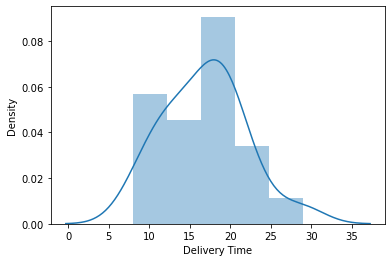

In [ ]:
sns.distplot(time['Delivery Time'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

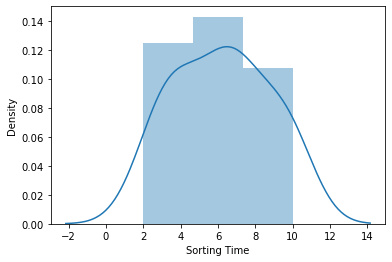

In [ ]:
sns.distplot(time['Sorting Time'])

In [ ]:
# Rename columns
time1 = time.rename({'Delivery Time': 'Delivery_time','Sorting Time':'Sorting_time'}, axis=1)

# Model Building

In [ ]:
model = smf.ols("Delivery_time~Sorting_time",data = time1).fit()   # y ~ x

<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

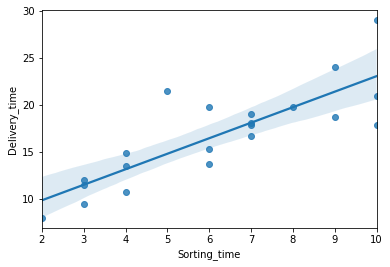

In [ ]:
# Regression plot
sns.regplot(x='Sorting_time',y='Delivery_time',data=time1)

In [ ]:
# Coefficient parameters
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [ ]:
# t-value and p-value
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [ ]:
# Rsquared value
model.rsquared ,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# Manual prediction for say sorting time 7
Delivery_time = (6.582734) + (1.649020)*(7)    # y = mx + c (Intercept c = 6.582734 & Slope m =1.649020)
Delivery_time

18.125874

In [ ]:
# Automatic Prediction for say sorting time 7, 4
newdata=pd.Series([7,4])
newdata

0    7
1    4
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])

In [ ]:
model.predict(data_pred)

0    18.125873
1    13.178814
dtype: float64

# #Finding Best model
# y ~ sqrt(x)

In [ ]:
x=np.sqrt(time1['Sorting_time'])

In [ ]:
x.head()

0    3.162278
1    2.000000
2    2.449490
3    3.000000
4    3.162278
Name: Sorting_time, dtype: float64

In [ ]:
model = smf.ols("Delivery_time~x",data = time1).fit()

In [ ]:
model.rsquared ,model.rsquared_adj

(0.695806227630867, 0.6797960290851232)

# To improve Rsquare value now we check for  sqrt(y) ~ x

In [ ]:
y=np.sqrt(time1['Delivery_time'])

In [ ]:
y

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: Delivery_time, dtype: float64

In [ ]:
model = smf.ols("y~Sorting_time",data = time1).fit()

In [ ]:
model.rsquared ,model.rsquared_adj

(0.704049871541756, 0.6884735489913221)

# For further imorovement check for sqrt(y) ~ sqrt(x)

In [ ]:
model = smf.ols("y~x",data = time1).fit()

In [ ]:
model.rsquared ,model.rsquared_adj

(0.7292011987544665, 0.7149486302678596)

# Check for log(y) ~ lof(x)

In [ ]:
y=np.log(time1['Delivery_time'])
x=np.log(time1['Sorting_time'])

In [ ]:
y

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Delivery_time, dtype: float64

In [ ]:
x

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: Sorting_time, dtype: float64

In [ ]:
model = smf.ols("y~x",data = time1).fit()

In [ ]:
model.rsquared ,model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [ ]:
# When y ~ x then rsquare=68.22%  ...................For Best model, rsquare value should be more than 0.85 or 85%
# When y ~ sqrt(x) then rsquare=69.58%
# When sqrt(y) ~ x then rsquare=70.40%
# When sqrt(y) ~ sqrt(x) rsquare=72.92%
# When log(y) ~ log(x) rsquare=77.21% ...............This is the best model as rsquare value is improved upto 77%